In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTmmFhlJP0j2dk9Wa6yyK9iZB1T2LHphXZiRVqknTSV6OYxzrnPamGsGQiICzkSpbgXBAGTiUtm40JP/pub?output=csv"
df = pd.read_csv(gsheet,decimal='.')
vin = df["vin 2"].to_numpy()
vout = df["vout 2"].to_numpy()
def lineal(x, m, b):
  y = m*x+b
  return y
len(vin)

28

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
v_err = df['escala (V)'].to_numpy()/6
v_err

array([0.03333333, 0.03333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333])

In [ ]:
gsheet = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4vfXizoR80AraBoI4h2lYeEHyTYH0cJhB9s6aLdT9vqX1ZMitfNGpHJRRKOKFxAARS01i3goP4L7Y/pub?output=csv'
df = pd.read_csv(gsheet,decimal='.')
F = df["Frec - kHz"].to_numpy(dtype= float)
A = df["Amplitud mV"].to_numpy(dtype= float)

In [ ]:
A_err = df['Escala mV'].to_numpy()/6

In [ ]:
A

array([ 100.,  104.,  111.,  118.,  124.,  133.,  142.,  152.,  164.,
        176.,  191.,  210.,  230.,  254.,  284.,  322.,  366.,  424.,
        498.,  506.,  732.,  916.,  976., 1020., 1090., 1140., 1200.,
       1260., 1340., 1420., 1500., 1600., 1700., 1820., 1940., 2060.,
       2180., 2340., 2580., 2700., 2820., 2940., 3040., 3100., 3160.,
       3180., 3200., 3200., 3180., 3180., 3140., 3100., 3020., 2960.,
       2900., 2820., 2780., 2500., 2260., 2020., 1820., 1540., 1310.,
       1110.,  936.,  776.,  660.,  560.,  480.,  416.,  362.,  318.,
        282.,  254.,  228.,  208.,  190.,  176.,  162.,  150.,  140.,
        132.,  124.,  118.,  112.,  107.,  102.])

In [ ]:
F[np.where(A==1540)[0][0]]-F[np.where(A==1600)[0][0]]

1.0

Maximo encontrado en ( 40.6 +/- 0.5) kHz


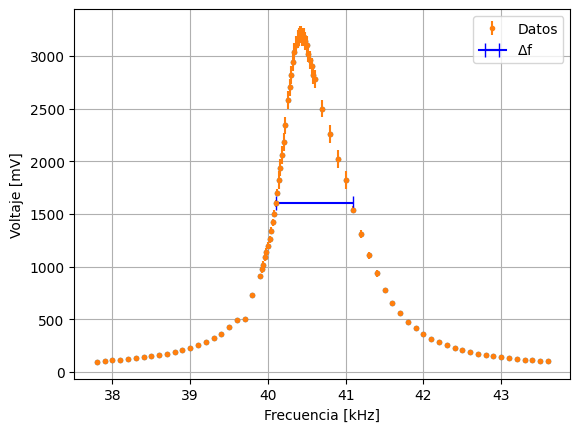

In [ ]:
plt.plot(F, A, '.')
plt.errorbar(F, A, yerr=A_err, fmt='.', label = "Datos")
plt.errorbar((F[np.where(A==1600)[0][0]]+F[np.where(A==1540)[0][0]])/2, max(A)/2, xerr=(F[np.where(A==1540)[0][0]]-F[np.where(A==1600)[0][0]])/2, capsize=5, color='blue', label = r"$\Delta$""f")
plt.xlabel('Frecuencia [kHz]')
plt.ylabel('Voltaje [mV]')
plt.legend()
plt.grid()
print('Maximo encontrado en (', (F[np.where(A==1600)[0][0]]+F[np.where(A==1540)[0][0]])/2, '+/- 0.5) kHz')
#plt.axvline(40.6, color="gray")
#plt.plot(1,1,marker ="o")

In [ ]:
def lorentz(w, A, w_0, gamma):
  y = A/((w_0**2-w**2)**2+(w*gamma)**2)
  return y

(None, <matplotlib.legend.Legend at 0x7e65a1b9b550>)

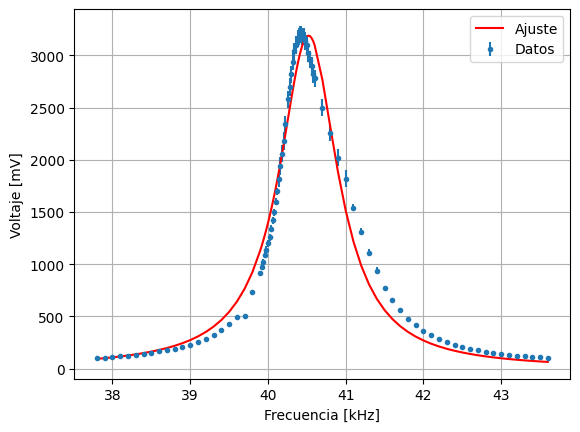

In [ ]:
params, cov = curve_fit(lorentz, 2*np.pi*F, A, p0=[3200, 2*np.pi*40.2, 1], maxfev=10000)
err = np.sqrt(np.diag(cov))
y_fit = lorentz(2*np.pi*F, params[0], params[1], params[2])
plt.figure()
plt.errorbar(F, A, yerr=A_err, fmt=".", label="Datos")
plt.plot(F, y_fit, "-", color="red", label = "Ajuste")
plt.xlabel("Frecuencia [kHz]"), plt.ylabel("Voltaje [mV]")
plt.grid(), plt.legend()

In [ ]:
print(params)
print(err)

[ 6.82068705e+09  2.54637380e+02 -5.74204703e+00]
[3.18793388e+08 5.66586272e-02 1.51145279e-01]


In [ ]:
# X label
A0 = np.max(A)
wOO = np.mean(F)
median = np.median(F)
desv_estandar = np.std(F)

print(f"mediana = {median}")
print(f"desviacion estandar= {desv_estandar}")

# Y label
print(A0)
w0 = np.interp(A0, A, F)
print(f"Frecuencia de resonancia= {w0}")

mediana = 40.36
desviacion estandar= 1.4223203545299816
3200.0
Frecuencia de resonancia= 43.6


In [ ]:
# (Intento de calcular el AAM) Encuentra el valor máximo de la función
valor_maximo = np.max(A)

# Encuentra los índices donde la función es igual a la mitad del valor máximo
indices_aam = np.where(A >= valor_maximo / 2)[0]

# Calcula el FWHM como la diferencia entre los valores de x en estos índices
aam = F[indices_aam[-1]] - F[indices_aam[0]]

print(f"El AAM de la función es aproximadamente {aam}")
print(valor_maximo)

El AAM de la función es aproximadamente 0.8999999999999986
3200.0


(None, <matplotlib.legend.Legend at 0x7e6566376e60>)

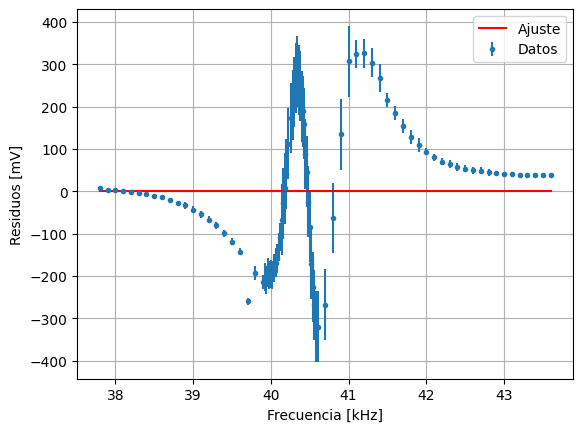

In [ ]:
plt.figure()
plt.errorbar(F, A - y_fit, yerr=A_err, fmt=".", label="Datos")
plt.plot(F, y_fit*0, "-", color="red", label = "Ajuste")
plt.xlabel("Frecuencia [kHz]"), plt.ylabel("Residuos [mV]")
plt.grid(), plt.legend()

In [ ]:
#buscando chi2
y_aj = y_fit

#reemplazar por lo que diga en plt error barr
x, y = F, A
ey = A_err #error de la variable independiente

res_sq = (y - y_aj) ** 2 #un χ² NO ponderado
ss = res_sq/(ey**2) #un χ² ponderado, considera mas relevante a las medidas mas precisas

ch2_pond = np.sum(ss) #sumatoria de ponderados
ch2_NOpond= np.sum(res_sq) #sumatoria de NO ponderados

print(f'χ² pond= {ch2_pond:.3f}')
print(f'χ² NO pond= {ch2_NOpond:.3f}')


χ² pond= 5268.106
χ² NO pond= 2213424.423
